In [1]:
import os
import csv
import math
import numpy as np
import pandas
import joblib
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import mean_squared_error, max_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split

from sklearn_pandas import DataFrameMapper

from sklearn2pmml.pipeline import PMMLPipeline
from sklearn2pmml.postprocessing import BusinessDecisionTransformer
from sklearn2pmml import sklearn2pmml

# local import
import RagnarockMapUtils

In [2]:
MAP_FOLDER = "data/ragnacustoms"
featureList = ["BPM", "NoteDensity", "HighNoteDensity2s"]
targetFeature = ["Difficulty"]

In [3]:
# pre-process maps to extract features

with open(f"{MAP_FOLDER}/features.csv", "w") as csvFile:
    csvW = csv.writer(csvFile)
    csvHeader = ["SongName"] + featureList + targetFeature
    csvW.writerow(csvHeader)

    for beatmap in RagnarockMapUtils.getMaps(MAP_FOLDER):
        print(f"{beatmap}")
        mapData = RagnarockMapUtils.getMapData(MAP_FOLDER, beatmap)
        songName = mapData["_songName"]
        songDuration = mapData["_songApproximativeDuration"] 
        songBpm = mapData["_beatsPerMinute"]
        
        diffMaps = RagnarockMapUtils.getDifficultyMaps(MAP_FOLDER, beatmap)
        for diffMapObj in diffMaps:
            print(f"{diffMapObj}")
            diffMap = diffMapObj[0]
            diffRank = diffMapObj[1]
            
            # don't train on maps with >10 rank
            if (diffRank > 10):
                print("diff rank > 10 excluded")
                continue
            
            diffMapData = RagnarockMapUtils.getDifficultyMapData(MAP_FOLDER, beatmap, diffMap)
            diffMapNoteDensity = RagnarockMapUtils.getNoteDensity(diffMapData, songDuration)
            diffMapLND2s = RagnarockMapUtils.getLocalNoteDensities(diffMapData, songDuration, songBpm, windowLength=2.75)
            maxND2s = np.quantile(diffMapLND2s, 0.95) if len(diffMapLND2s) > 0 else 0;
            #diffMapLND5s = getLocalNoteDensities(diffMapData, songDuration, songBpm, windowLength=5.00)
            #maxND5s = np.quantile(diffMapLND5s, 0.90) if len(diffMapLND1s) > 0 else 0;
            #diffMapCV3s = getLocalColumnVariety(diffMapData, songDuration, songBpm)
            #maxCV3s = np.quantile(diffMapCV3s, 0.75) if len(diffMapCV3s) > 0 else -1
            #features = [songBpm, diffMapNoteDensity, np.quantile(diffMapLocalNoteDensities, 0.50), maxND, diffMapColVarietyTop]
            features = [songBpm, diffMapNoteDensity, maxND2s]#, maxND5s, maxCV3s]
            row = [songName] + features + [diffRank]
            #print(f"{songName} - {songBpm}, {diffMapNoteDensity}, {maxND}, {diffMapColVarietyTop}")
            csvW.writerow(row)

asongusamongusthechalkeatersfeatblackgryphnbrollyy
('Easy.dat', 6)
benzinrammsteinvred
('ExpertPlusStandard.dat', 8)
valhallacallingduetvermiracleofsoundpkbeam
('Easy.dat', 7)
happysongbringmethehorizonvred
('ExpertPlusStandard.dat', 8)
ijustwannalivegoodcharlottevred
('ExpertPlusStandard.dat', 7)
overmyheadcablecaradaytoremembercolvion
('Easy.dat', 7)
keelhauledalestormoffyghost
('HardStandard.dat', 5)
nofearforthesettingsunamonamarthsbsce
('HardStandard.dat', 9)
messengermessengerfitforakingsilentboss
('Easy.dat', 8)
feliznavidadchristmasrockcoverfirsttoelevenwatsu
('Easy.dat', 4)
duelofthefatesstarwarsmetalmegaraptorwatsu
('Easy.dat', 8)
playervsdrrmbmmasanorihikichimasayukinagaoleo
('Easy.dat', 9)
angusmcfifegloryhammerlordubuntu
('Easy.dat', 5)
('Normal.dat', 8)
mygiftisyougwenstefaniwatsu
('Easy.dat', 6)
yariloarkonadreddmartyr
('Easy.dat', 7)
heavydirtysoultwentyonepilotsghasts
('Easy.dat', 4)
('Normal.dat', 7)
('Hard.dat', 10)
schubsetanzfeuerschwanzelaojan
('ExpertPlusStandard

vicegripparkwaydrivemcperlt
('Easy.dat', 4)
('Normal.dat', 6)
satinpantieskawaispritegooba
('Easy.dat', 6)
kingshienkageyamagalacitcsaz
('Easy.dat', 7)
wikingerblutfeuerschwanzsoundsgerman
('NormalStandard.dat', 5)
whatsnewscoobydoosimpleplanbenofmidgard
('Easy.dat', 9)
warriorsoftheworldunitedfeuerschwanzpkbeam
('Easy.dat', 8)
entersandmanmetallicasilentboss
('Easy.dat', 8)
vargrthemeconfrontationgeneticprophesythelordweirdsloughfegsilentboss
('Easy.dat', 5)
('Normal.dat', 7)
('Hard.dat', 9)
slayfeluciaqoodn
('Easy.dat', 5)
sevendaysaweekthesoundsabevstheworld
('Easy.dat', 7)
('Normal.dat', 9)
makeeverythingokfromashestonewnerrox
('Easy.dat', 7)
wakemeupbeforeyougofishingtripleqcolvion
('Easy.dat', 8)
throughthefireandflamesdragonforcewatsu
('Easy.dat', 7)
('Normal.dat', 9)
('Hard.dat', 10)
runyoutheqemistsbrollyy
('Easy.dat', 7)
ticktickboomthehivesqoodn
('Easy.dat', 7)
catacombesmagoyondwatsu
('Easy.dat', 6)
pluginbabymusescarecrxw
('Easy.dat', 6)
hellraisermotorheadsilentboss
('Eas

('Normal.dat', 8)
thepokemonthememetalcoverjonathanyoungjasonpaigewatsu
('Easy.dat', 9)
vainillaelepssoffizllydrsuppo
('Easy.dat', 8)
rangbasantibloodywoodpixelcat
('Easy.dat', 7)
canifriendyouonbassbooklolcamelliafeatnanahirarinkitmsj
('Easy.dat', 7)
('Normal.dat', 8)
('Hard.dat', 9)
grottiskldbigos
('Easy.dat', 3)
thetrooperironmaidenkoishi
('Easy.dat', 6)
('Normal.dat', 9)
valleyofdeathsabatonsilentboss
('Easy.dat', 10)
downwiththesicknessdisturbedgooba
('Easy.dat', 6)
motherearthwithintemptationrhaegar
('NormalStandard.dat', 6)
('ExpertStandard.dat', 7)
squidgamedoittoitdblockstefaneditacrazevred
('ExpertStandard.dat', 7)
('ExpertPlusStandard.dat', 9)
faradenzalittlebigvred
('HardStandard.dat', 4)
('ExpertStandard.dat', 5)
('ExpertPlusStandard.dat', 7)
muscleboundforgloryfeatangusmcsixgrailknightsadmiral
('Easy.dat', 9)
tobelovedpaparoachvred
('ExpertPlusStandard.dat', 7)
norupoheilungfreakindude
('NormalStandard.dat', 5)
movepiecetimfollingooba
('Easy.dat', 9)
sweettrueliesbeastin

skidsjaxkrewxin
('ExpertStandard.dat', 5)
soldierofarmiessabatonwatsu
('Easy.dat', 8)
lordsofpowermetfeuerschwanzpkbeam
('Easy.dat', 7)
('Normal.dat', 10)
hemelonolilodisneymarkkealiihoomaluandalansilvestrislimestar
('Easy.dat', 1)
bringmetolifeevanescenceblackcrew
('Easy.dat', 5)
bismarcksabatonmcperlt
('Easy.dat', 6)
firstoftheyearequinoxskrillexvred
('ExpertPlusStandard.dat', 9)
weareyoungfunbossbaby
('Easy.dat', 4)
('Normal.dat', 6)
funeralderangementsiceninekillsvred
('ExpertStandard.dat', 5)
('ExpertPlusStandard.dat', 8)
bowdowndividemusicwatsu
('Easy.dat', 9)
lalalalalalahardstylebootlegbudspencerterencehilltobe
('HardStandard.dat', 6)
('ExpertStandard.dat', 8)
beforeiforgetslipknotvred
('ExpertStandard.dat', 5)
('ExpertPlusStandard.dat', 7)
phppiratenthemesongphppiratenlucdewit
('Easy.dat', 5)
seventhrumofaseventhrumalestormabevstheworld
('Easy.dat', 5)
('Normal.dat', 7)
('Hard.dat', 9)
madeoutofnothingallthatiamcoheedandcambriagooba
('Easy.dat', 6)
stormtrooperssabatonsilentbo

('Hard.dat', 9)
professorsthemethelordweirdsloughfegsilentboss
('Easy.dat', 7)
creativeexercisemariopaintsilvagunnercolvion
('Easy.dat', 5)
ijimedamezettaibabymetalvred
('ExpertPlusStandard.dat', 10)
circlingjoelschochthelastword
('Easy.dat', 1)
danadanbloodywoodxelbex
('Easy.dat', 9)
gravityproofheartshandssilentboss
('Easy.dat', 8)
onestepcloserlinkinparkdylanthegamerdad
('Easy.dat', 1)
('Normal.dat', 3)
inspectorgadgetmetalcoverleomoracchioliwatsu
('Easy.dat', 6)
ithastobethiswayjamiechristophersonvoyevsky
('Easy.dat', 5)
('Normal.dat', 7)
('Hard.dat', 9)
chopumanabunamikicrimsonfox
('Easy.dat', 7)
('Normal.dat', 9)
rulesofnaturejamiechristofersonftjasonmillercrimsonfox
('Easy.dat', 6)
('Normal.dat', 9)
fillingthenameofstarbombwatsu
('Easy.dat', 6)
sevenspiritsinwhitecoatsnyttlandwafflecopter
('Easy.dat', 8)
winterwonderlandherecomessantaclaussnoopdoggannakendrickbrollyy
('Easy.dat', 5)
unnaturalselectionmusescarecrxw
('Easy.dat', 7)
allthesethingsthativedonethekillersjeezusjuiicee


('Normal.dat', 10)
partofmedisturbedqoodn
('Easy.dat', 6)
('Normal.dat', 7)
hangingonknowervred
('ExpertStandard.dat', 6)
('ExpertPlusStandard.dat', 8)
gallopingsteedstenggercavalryramiro
('Easy.dat', 8)
themagicofchristmasdaydeesniderlzzyhalewatsu
('Easy.dat', 5)
storytimenightwishdreigonix
('Easy.dat', 7)
anythingtonumbvarialscerjo
('Easy.dat', 8)
crushedparkwaydrivesilentboss
('Easy.dat', 4)
('Normal.dat', 6)
('Hard.dat', 8)
gladdevisstickgladdepalingvred
('ExpertStandard.dat', 7)
('ExpertPlusStandard.dat', 10)
awholenewworldmetalcoverdmetalstarswatsu
('Easy.dat', 9)
mahouhatsudouyasuharutakanashivred
('ExpertStandard.dat', 5)
('ExpertPlusStandard.dat', 8)
powerdividemusicwatsu
('Easy.dat', 8)
toccataoverwerksilentboss
('Easy.dat', 8)
heartbeatheartbreakcoverbyjennypersonacolvion
('Easy.dat', 8)
monsterskilletvred
('ExpertStandard.dat', 6)
brickhouseiicommodoressuijuris
('Easy.dat', 3)
illmakeamanoutofyourockcoverpeytonparrishwatsu
('Easy.dat', 7)
sometimesyourethehammersometimesyou

('Normal.dat', 3)
('Hard.dat', 4)
playedalivethebongosongsafriduovred
('ExpertStandard.dat', 7)
('ExpertPlusStandard.dat', 9)
cthulhugrailknightssilentboss
('Easy.dat', 6)
('Normal.dat', 10)
caramelldansencaramellagirlsratfriend
('Easy.dat', 7)
thissideofparadisecoyotetheoryrailzen
('ExpertPlusStandard.dat', 6)
musundehiraiterasetsutomukurohachichurchill
('Easy.dat', 6)
('Normal.dat', 10)
wirsindmidgarderdlingvvildcard
('Easy.dat', 7)
serpentheadbattlejuicedrsuppo
('Easy.dat', 8)
norwegianreggaetonfeatcharlyglamourgigatronnanowarofsteelwatsu
('Easy.dat', 8)
holydiverdiocrashgibson
('Easy.dat', 9)
ciriceghostcross
('Easy.dat', 6)
throughthefireandflamesdragonforcejeezusjuiicee
('ExpertPlusStandard.dat', 10)
soyezpretesmagoyondwatsu
('Easy.dat', 7)
doomsdayarchitectsnerrox
('Easy.dat', 9)
fiestapaganamgodeozimridi
('ExpertStandard.dat', 7)
theshiningmeetsmetalerockwatsu
('Easy.dat', 8)
unmondesansdangerfranckkellerygalamarwatsu
('Easy.dat', 7)
sandstormdarudeimridi
('HardStandard.dat', 5

arisesepulturavred
('ExpertPlusStandard.dat', 9)
flyawaygloryhammerjdjurassic
('Easy.dat', 6)
bonbonomniboicolvion
('Easy.dat', 6)
unstoppabledisturbedqoodn
('Easy.dat', 5)
namelessstorythattimeigotreincarnatedasaslimesaphiram
('Easy.dat', 2)
('Normal.dat', 4)
mementomorifeuerschwanzpkbeam
('Easy.dat', 8)
spartasabatonsilentboss
('Easy.dat', 5)
('Normal.dat', 9)
madhatteravengedsevenfoldsamehere
('Easy.dat', 6)
downinthetrenchessonsoftexassilentboss
('Easy.dat', 9)
newbornmusehalifaxdiamond
('Easy.dat', 7)
oceanplanetgojiragooba
('Easy.dat', 8)
thepastisdeadbeartoothbarrelrolljones
('Easy.dat', 7)
changesxxxtentacionandre
('Easy.dat', 1)
('Normal.dat', 3)
idejeelnithegrenmapigo
('ExpertPlusStandard.dat', 9)
frictionalnevadaabridgedvenetiansnareskolajo
('Easy.dat', 10)
murmaiderdeathkloknivite
('Easy.dat', 9)
wavesimaginedragonstheepicnarwhal
('Easy.dat', 5)
popcornmicrowavemixtheboomtangboysvred
('HardStandard.dat', 4)
('ExpertStandard.dat', 6)
('ExpertPlusStandard.dat', 8)
saworbitcul

santaclausiscomingtotownmetalcoverorionsreignftminnivawatsu
('Easy.dat', 8)
voodoopeoplependulummixshortvertheprodigyvred
('ExpertStandard.dat', 6)
('ExpertPlusStandard.dat', 9)
bluemondayneworderbozygrzmot
('Easy.dat', 8)
immigrantsongledzeppelinrangajosh
('Easy.dat', 6)
assassinscreedsrodalmenarablackcrew
('Easy.dat', 5)
racetotheseasabatonmrdudemanguy
('Easy.dat', 3)
('Normal.dat', 6)
villainvirusftcamelliakobaryocrimsonfox
('Easy.dat', 14)
diff rank > 10 excluded
rebirthingskilletsamehere
('Easy.dat', 8)
asgoretobyfoxgooba
('Easy.dat', 7)
inthedarkofthenightmetalcoverjonathanyoungwatsu
('Easy.dat', 8)
thbornsonbluessaracenosilentboss
('Easy.dat', 8)
whokilledunowenakatsukirecordsliztriangleskeelie
('ExpertPlusStandard.dat', 6)
turbokillercarpenterbrutdrsuppo
('Easy.dat', 7)
painkillerjudaspriestrhaegar
('ExpertPlusStandard.dat', 10)
yngwazzonenheidevolkherides
('Easy.dat', 1)
spearofjusticetobyfoxgooba
('Easy.dat', 7)
highergroundrasmussensilentboss
('Easy.dat', 2)
('Normal.dat', 5

diemfdiedopevred
('ExpertStandard.dat', 5)
('ExpertPlusStandard.dat', 8)
insideoutevevred
('ExpertPlusStandard.dat', 7)
elorenezzthegrenmapigo
('HardStandard.dat', 4)
('ExpertStandard.dat', 7)
('ExpertPlusStandard.dat', 9)
bigblastsonicdaisukeishiwatariandnaokihashimotoblobby
('Easy.dat', 7)
congratulationspewdiepieftroomieboyinabandgooba
('Easy.dat', 7)
youmakemefeellikeitshalloweenmusewatsu
('Easy.dat', 7)
fistofstalinthemonolithdeathcultramiro
('Easy.dat', 8)
searchingconfidencedeadinexistencesilentboss
('Easy.dat', 9)
stitchwagewarzinapse
('Easy.dat', 5)
redlikerosespartjeffwilliamscaseyleewilliamspigo
('Hard.dat', 6)
('Expert.dat', 8)
terminatorsongkafzielblackcrew
('Easy.dat', 5)
whitewashedaugustburnsredsilentboss
('Easy.dat', 10)
thesufferingcoheedandcambriagooba
('Easy.dat', 6)
intobattleensiferumimmortalx
('Easy.dat', 7)
welcomeknownamehashe
('Easy.dat', 7)
kaunazdagazbrothersofmetallexkidd
('Easy.dat', 7)
feliznavidadjosefelicianoslimestar
('Easy.dat', 4)
('Normal.dat', 6)
s

In [4]:
# split into train and test samples

TEST_PERCENT = 0.2

data = pandas.read_csv(f"{MAP_FOLDER}/features.csv")

# remove name column
X_in = data.iloc[:,:-1]
Y_in = data["Difficulty"]
X_train, X_test, Y_train, Y_test = train_test_split(X_in, Y_in, test_size=TEST_PERCENT, random_state=42)

X_trainnames = X_train.iloc[:, 0]
X_testnames = X_test.iloc[:, 0]

X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

def trainSvrModel(C, e=0.5):
    column_preprocessor = DataFrameMapper([
        (featureList, [StandardScaler()])
    ])
    
    table_preprocessor = Pipeline([
        ("svr", SVR(C=C, epsilon=e))
    ])

    pmmlPipeline = PMMLPipeline([
        ("columns", column_preprocessor),
        ("table", table_preprocessor),
    ])
    pmmlPipeline.fit(X_train, Y_train)
    pmmlPipeline.verify(X_train.sample(n = 1))
    return pmmlPipeline

In [5]:
# find best C parameter

C = np.linspace(0.01, 50, num=1000)

# since actual difficulty ranks are integer, we take epsilon = 0.5
e = [0.5]
bestC = C[0]
beste = e[0]
bestErrRms = float("inf")

for i in range(len(C)):
    for j in range(len(e)):
        pmmlPipeline = trainSvrModel(C[i], e[j])

        Y_pred = pmmlPipeline.predict(X_test)
        errRms = mean_squared_error(Y_test, Y_pred, squared=False)
        if errRms < bestErrRms:
            bestC = C[i]
            beste = e[j]
            bestErrRms = errRms

print(f"C = {round(bestC, 2)}, e = {round(beste, 2)}, Error: {round(bestErrRms, 3)} RMS")

C = 33.74, e = 0.5, Error: 1.219 RMS


Tested 357 songs

Total RMS Error: 1.219, Max Error: 7.18

Largest errors:
                                                  Song Name Predicted   ... Actual Error
228                                            The Rumbling      8.18   8.0      1  7.18
20                                         Telecaster B-Boy       6.5   7.0      1   5.5
10                                          One Step Closer      7.03   7.0      3  4.03
276                                             Whatsername      7.83   8.0      4  3.83
50                                        Moonlight Banquet      5.48   5.0      9  3.52
202                                                  Clocks      6.48   6.0      3  3.48
351  A Boat Made from a Sheet of Newspaper - Risk of Rain 2      6.47   6.0      3  3.47
311                             Light With a Sharpened Edge      8.33   8.0      5  3.33
9                                          群青 (Ultramarine)      5.83   6.0      9  3.17
297                                

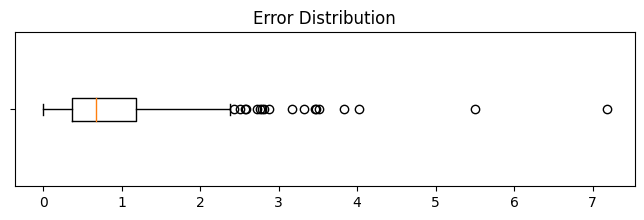

In [6]:
# display error of model

pmmlPipeline = trainSvrModel(bestC)

def calcError(model, pred_in_names, pred_in, actual_out):
    pred_out = model.predict(pred_in)
    errRms = mean_squared_error(actual_out, pred_out, squared=False)
    errMax = max_error(actual_out, pred_out)

    print(f"Tested {pred_out.shape[0]} songs\n")
    print(f"Total RMS Error: {round(errRms, 3)}, Max Error: {round(errMax, 3)}\n")
    
    print(f"Largest errors:")
    result = pandas.DataFrame(np.array([
        pred_in_names,
        np.round(pred_out, 2),
        np.round(pred_out, 0),
        np.array(actual_out),
        np.round(np.array(abs(actual_out - pred_out)), 2)
    ]).transpose())
    result.rename(columns={0: "Song Name", 1:"Predicted", 2: "...", 3:"Actual", 4:"Error"}, inplace=True)
    result.sort_values(by="Error", ascending=False, inplace=True)
    print(result.to_string())
    
    fig, ax = plt.subplots(figsize=(8, 2))
    ax.set_title("Error Distribution")
    plt.yticks([])
    plt.boxplot(result.iloc[:,-1], vert = 0, labels=[""])
    plt.show()
    
    
calcError(pmmlPipeline, X_testnames, X_test, Y_test)

Tested 192 songs

Total RMS Error: 1.456, Max Error: 4.253

Largest errors:
                                                  Song Name Predicted   ... Actual Error
60                                         Universe on fire      6.25   6.0      2  4.25
114                                                   Vodka      5.59   6.0      2  3.59
120                                           Join The Riot       4.4   4.0      1   3.4
96                                Rise of the Chaos Wizards      6.27   6.0      3  3.27
108                                             Chomp Chomp      7.18   7.0      4  3.18
45                      The Fires of Ancient Cosmic Destiny      6.17   6.0      3  3.17
18                                              Battlefield      5.02   5.0      2  3.02
132                                        One For The Road      5.99   6.0      3  2.99
42                                             Memento Mori      4.88   5.0      2  2.88
87                                

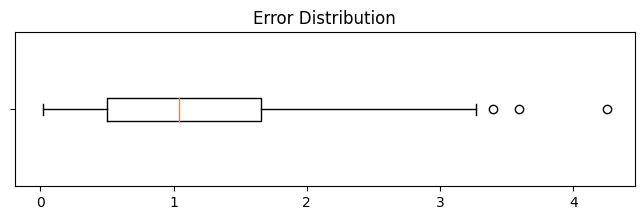

In [7]:
# Evaluate the model on other datasets
data_other = pandas.read_csv("data/OST/features.csv")

# remove name column
X_in_other = data_other.iloc[:,:-1]
X_in_names = data_other.iloc[:, 0]
Y_in_other = data_other["Difficulty"]

calcError(pmmlPipeline, X_in_names, X_in_other, Y_in_other)

In [166]:
# Export
sklearn2pmml(pmmlPipeline, "Edda-MLDP-Python.pmml")
joblib.dump(pmmlPipeline, "Edda-MLDP-Python.joblib", compress=3)

['Edda-MLDP-Python.joblib']